In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import kagglehub

# Download dataset using kagglehub
path = kagglehub.dataset_download("akram24/google-stock-price-test")
dataset_path = f"{path}/Google_Stock_Price_Test.csv"

# Load dataset
data = pd.read_csv(dataset_path, usecols=[1]).dropna().values.astype(float)

# Normalize data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Prepare time series data
def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Ensure dataset has enough samples
time_step = min(10, len(data) - 1)
if len(data) > time_step:
    X, y = create_dataset(data, time_step)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define RNN model
    model = Sequential([
        SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(time_step, 1)),
        SimpleRNN(50, activation='relu'),
        Dense(1)
    ])

    # Compile and train model
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate model
    print(f"Test Loss: {model.evaluate(X_test, y_test)}")
else:
    print("Error: Not enough data points to create sequences. Consider using a smaller time step.")


Epoch 1/20


C:\androidst\anainstalled\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.4426 - val_loss: 0.1227
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.3241 - val_loss: 0.0519
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.2279 - val_loss: 0.0119
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1500 - val_loss: 0.0014
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0956 - val_loss: 0.0178
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0658 - val_loss: 0.0643
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.0604 - val_loss: 0.1301
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0777 - val_loss: 0.1753
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0928 - val_loss: 0.1769
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.0892 - val_loss: 0.1519
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0745 - val_loss: 0.1211
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0592 - val_loss: 0.0928
Epoch 1

C:\androidst\anainstalled\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3717e-04
Test Loss: 0.0007433635764755309
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


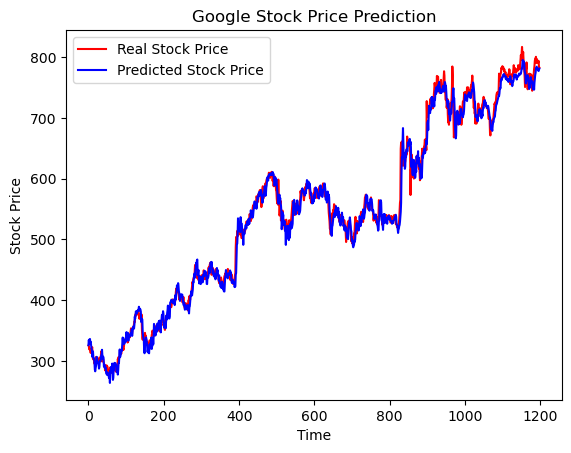

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('Google_Stock_Price_Train.csv')  # adjust path if needed
training_set = data['Open'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

# Create sequences
X, y = [], []
for i in range(60, len(training_set_scaled)):
    X.append(training_set_scaled[i - 60:i, 0])
    y.append(training_set_scaled[i, 0])

# Check if enough data was collected
if len(X) == 0:
    print("Error: Not enough data points to create sequences. Consider using a smaller time step.")
else:
    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build RNN model
    model = models.Sequential([
        layers.SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluate
    loss = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}")

    # Prediction on training set (for visualization)
    predicted_stock_price = model.predict(X)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
    real_stock_price = scaler.inverse_transform(training_set_scaled[60:])

    # Plotting
    plt.plot(real_stock_price, color='red', label='Real Stock Price')
    plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
